In [1]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, clear_output

# Data

In [5]:
P01 = 160            #kPa

In [6]:
T01 = 400            #kelvin

In [7]:
P_N = 100            #kPa

In [8]:
gama = 1.4
R = 0.287            #kj/kg-k
C_v = 0.717          #kj/kg-k

In [9]:
rho01 = P01/(R*T01)

In [23]:
L1 = 3       #meter
L2 = 1       #meter
L3 = 5       #meter

In [24]:
D1 = 0.2     #meter
D3 = 0.1     #meter

# Grid Points

In [25]:
dx = 0.1                                        #meter
x1 = np.linspace(0, L1, int(L1/dx+1))
x2 = np.linspace(L1, L1+L2, int(L2/dx+1))
x3 = np.linspace(L1+L2, L1+L2+L3, int(L3/dx+1))

In [26]:
N = int(L1/dx+1)+int(L2/dx+1)+int(L3/dx+1)-2                     #Number of Grid Points

In [27]:
N

91

In [28]:
x = np.array(list(x1)+list(x2[1:])+list(x3[1:]), dtype=float)

In [29]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ])

In [30]:
A = np.zeros(len(x))

In [31]:
for i in range(0, len(x)):
    
    if x[i] <= L1:
        
        A[i] = math.pi*D1**2/4
        
    elif x[i] <= L1+L2:
        
        D2 = (x[i]-L1)/L2*(D3-D1)+D1
        A[i] = math.pi*D2**2/4
        
    else:
        
        A[i] = math.pi*D3**2/4

# Steady State

In [16]:
#primitive variables at t = 0:
rho_n = 0.5*np.ones(len(x))
v_n = 0.5*np.ones(len(x))
T_n = 0.5*np.ones(len(x))
P_n = rho_n*T_n

CFL = 0.6

n = np.where(x == L1+L2)[0][0]          #index for throat
A = A/A[n]
residual = 10**(-3)
iteration = 1

residual1 = 1
residual2 = 1
residual3 = 1

#dU1/dt, dU2/dt, dU3/dt:
dU1_dt = np.ones(len(x))
dU2_dt = np.ones(len(x))
dU3_dt = np.ones(len(x))

#(dU1/dt)_bar, (dU2/dt)_bar:, (dU3/dt)_bar:
dU1_dt_bar = np.ones(len(x))
dU2_dt_bar = np.ones(len(x))
dU3_dt_bar = np.ones(len(x))

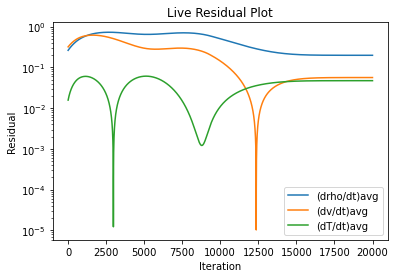

In [17]:
# Set up the initial plot
fig, ax = plt.subplots()
Iteration = []
Residual1 = []
Residual2 = []
Residual3 = []
dm = []
line1, = ax.plot(Iteration, Residual1, label='(drho/dt)avg')
line2, = ax.plot(Iteration, Residual2, label='(dv/dt)avg')
line3, = ax.plot(Iteration, Residual3, label='(dT/dt)avg')
ax.set_yscale('log')
ax.set_xlabel('Iteration')
ax.set_ylabel('Residual')
ax.set_title('Live Residual Plot')
ax.legend()
dm_dot = 1

while (dm_dot>0.01):
    
    print(f'this is iteration = {iteration}')
    dt = np.min(CFL*dx/((gama*R*1000*abs(T_n)*T01)**0.5+abs(v_n)*(gama*R*1000*T01)**0.5))
    
    if np.isnan(dt):
        
        break
    #dt = 0.000015
    print(f'dt = {dt}')

    #U1, U2, U3:
    U1 = rho_n*A
    U2 = rho_n*v_n*A
    U3 = rho_n*(T_n/(gama-1)+gama/2*v_n**2)*A

    #F1, F2, F3:
    F1 = U2
    F2 = U2**2/U1+(gama-1)/gama*(U3-gama/2*U2**2/U1)
    F3 = gama*U2*U3/U1-gama*(gama-1)/2*U2**3/U1**2
    J2 = (gama-1)/gama*(U3-gama/2*U2**2/U1)*math.pi/2*A*(D3-D1)/L2

    for i in range(0, len(x)-1):
    
        dU1_dt[i] = -(F1[i+1]-F1[i])/dx
        dU2_dt[i] = -(F2[i+1]-F2[i])/dx+J2[i]
        dU3_dt[i] = -(F3[i+1]-F3[i])/dx
        
    #print(f'dU1_dt_bar = {dU1_dt[i]}')
    
    #U1_np1_bar, U1_np1_bar, U1_np1_bar:    np1: n+1
    U1_np1_bar = U1+dU1_dt*dt
    U2_np1_bar = U2+dU2_dt*dt
    U3_np1_bar = U3+dU3_dt*dt    

    #primitive variables:
    rho_bar = U1_np1_bar/A
    v_bar = U2_np1_bar/U1_np1_bar
    T_bar = (gama-1)*(U3_np1_bar/U1_np1_bar-gama/2*v_bar**2)
    P_bar = rho_bar*T_bar

    #F1_bar, F2_bar, F3_bar, J2_bar:
    F1_bar = U2_np1_bar
    F2_bar = U2_np1_bar**2/U1_np1_bar+(gama-1)/gama*(U3_np1_bar-gama/2*U2_np1_bar**2/U1_np1_bar)
    F3_bar = gama*U2_np1_bar*U3_np1_bar/U1_np1_bar-gama*(gama-1)/2*U2_np1_bar**3/U1_np1_bar**2
    J2_bar = (gama-1)/gama*(U3_np1_bar-gama/2*U2_np1_bar**2/U1_np1_bar)*math.pi/2*A*(D3-D1)/L2

    for i in range(1, len(x)):
    
        dU1_dt_bar[i] = -(F1_bar[i]-F1_bar[i-1])/dx
        dU2_dt_bar[i] = -(F2_bar[i]-F2_bar[i-1])/dx+J2_bar[i]
        dU3_dt_bar[i] = -(F3_bar[i]-F3_bar[i-1])/dx
        
    print(f'dU1_dt_bar = {dU1_dt_bar[i]}')
    
    #average of time derivatives:
    dU1_dt_avg = 0.5*(dU1_dt_bar+dU1_dt)
    dU2_dt_avg = 0.5*(dU2_dt_bar+dU2_dt)
    dU3_dt_avg = 0.5*(dU3_dt_bar+dU3_dt)

    #U1_np1, U1_np2, U1_np3
    U1_np1 = U1+dU1_dt_avg*dt
    U2_np1 = U2+dU2_dt_avg*dt
    U3_np1 = U3+dU3_dt_avg*dt

    #decoding primitive variables:
    rho_np1 = U1_np1/A
    v_np1 = U2_np1/U1_np1
    T_np1 = (gama-1)*(U3_np1/U1_np1-gama/2*(U2_np1/U1_np1)**2)
    P_np1 = rho_np1*T_np1
    
    #subsonic inlet:
    P_np1[0] = P01/P01
    T_np1[0] = T01/T01
    a = (gama*R*1000*T_np1[0]*T01)
    v_np1[0] = v_n[0]+dt*a*v_n[0]*math.log(A[1]/A[0])
    rho_np1[0] = P_np1[0]/T_np1[0]
 
    #outlet:
    P_np1[N-1] = P_N/P01
    rho_np1[N-1] = rho_n[N-1]
    a = (gama*R*1000*T_np1[N-1]*T01)
    v_np1[N-1] = v_n[N-1]-dt*a*v_n[N-1]*math.log(A[N-1]/A[N-2])
    
    
    
    residual1 = abs(rho_np1[n]-rho_n[n])/dt
    residual2 = abs(v_np1[n]-v_n[n])/dt
    residual3 = abs(T_np1[n]-T_n[n])/dt

    #residuals:
    drho_dt_avg = abs((rho_np1[n]-rho_n[n])/dt)
    dv_dt_avg = abs((v_np1[n]-v_n[n])/dt)
    dT_dt_avg = abs((T_np1[n]-T_n[n])/dt)
    
    rho_n = rho_np1.copy()
    v_n = v_np1.copy()    
    T_n = T_np1.copy() 
    P_n = P_np1.copy()
    
    #delta_m_dot
    dm_dot = abs(rho_n[0]*(D1**2)*v_n[0]-rho_n[n]*(D3**2)*v_n[n])
    
    print(f'residual1 = {residual1}, residual2 = {residual2}, residual3 = {residual3}')
    print(f'delta m_dot = {dm_dot}')
    # Append the current iteration number and residual values to the x and y arrays
    Iteration.append(iteration)
    Residual1.append(drho_dt_avg)
    Residual2.append(dv_dt_avg)
    Residual3.append(dT_dt_avg)
    dm.append(dm_dot)
    
    line1.set_data(Iteration, Residual1)
    line2.set_data(Iteration, Residual2)
    line3.set_data(Iteration, Residual3)
    ax.relim()
    ax.autoscale_view()
    
    # Update and display the plot after each iteration
    clear_output(wait=True)
    display(fig)
    plt.pause(0.001)
    
    iteration += 1
        
    if iteration==20000:
        break
# Show the final plot after all iterations are completed
plt.show()

Text(0, 0.5, 'delta mass flow[kg/sec]')

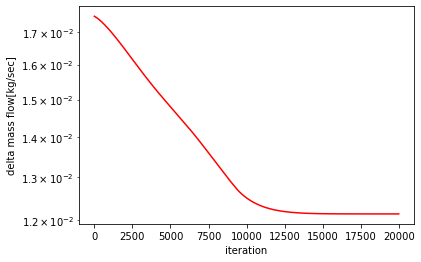

In [42]:
plt.plot(Iteration, dm, linestyle = "solid", color='red')
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('delta mass flow[kg/sec]')

In [32]:
V = v_n*(gama*R*1000*abs(T_n)*T01)**0.5
Rho = rho_n*rho01
T = T_n*T01

V[1] = (x[1]-x[0])/(x[3]-x[0])*(V[3]-V[0])+V[0]
V[2] = (x[2]-x[0])/(x[3]-x[0])*(V[3]-V[0])+V[0]

Rho[1] = (x[1]-x[0])/(x[3]-x[0])*(Rho[3]-Rho[0])+Rho[0]
Rho[2] = (x[2]-x[0])/(x[3]-x[0])*(Rho[3]-Rho[0])+Rho[0]

T[1] = (x[1]-x[0])/(x[3]-x[0])*(T[3]-T[0])+T[0]
T[2] = (x[2]-x[0])/(x[3]-x[0])*(T[3]-T[0])+T[0]

Text(0, 0.5, 'velocity[meter/sec]')

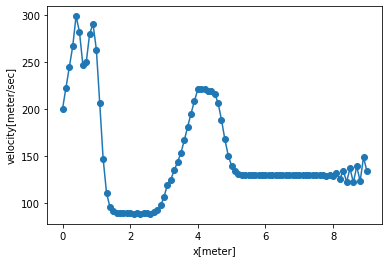

In [38]:
plt.plot(x, V, marker = "o", linestyle = "solid")
plt.xlabel('x[meter]')
plt.ylabel('velocity[meter/sec]')

Text(0, 0.5, 'T[k]')

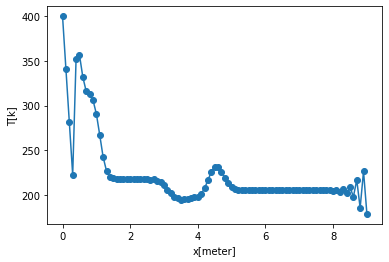

In [39]:
plt.plot(x, T, marker = "o", linestyle = "solid")
plt.xlabel('x[meter]')
plt.ylabel('T[k]')

Text(0, 0.5, 'Rho[kg/m^2]')

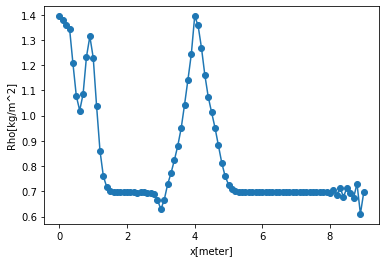

In [40]:
plt.plot(x, Rho, marker = "o", linestyle = "solid")
plt.xlabel('x[meter]')
plt.ylabel('Rho[kg/m^2]')

In [52]:
df = pd.DataFrame({'rho':Rho/rho01,'v':V/(gama*R*1000*T01)**0.5,'T':T/T01})

In [53]:
df.to_excel('steady.xlsx', index=False)